<a href="https://colab.research.google.com/github/PuspitoMA/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
import numpy as np 
import matplotlib.pyplot as plt 

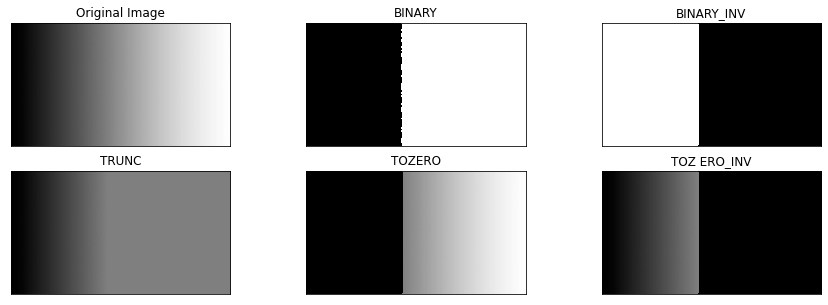

In [ ]:
filename = ('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/gradient.jpg') 
img = cv.imread(filename) 
thresh = 127      

#nilai Threshold yang ditentukan  
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain  itu bernilai 0(hitam) 
ret, thresh1 = cv.threshold(img, 125, 255, cv.THRESH_BINARY) 
#2. thresh2 adalah binary threshold inverse 
ret, thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate 
ret, thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
#4. Threshold Tozero 
ret, thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse 
ret, thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)         
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZ ERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 
 
plt.figure(figsize = (15,5)) 
for i in range(len(images)): 
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])   
  plt.xticks([]), plt.yticks([]) 

plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


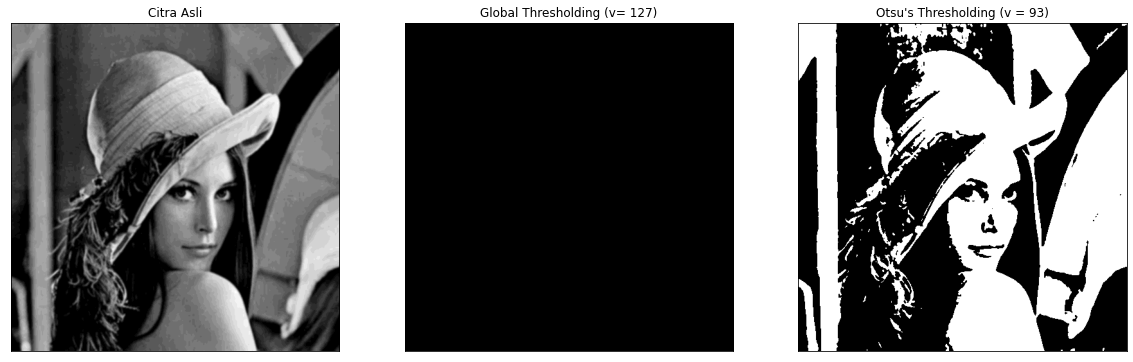

In [ ]:
lena = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/lena_gs_lc2.jpg', 0) 
blur = cv.GaussianBlur(lena,(5,5),0)

hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
A = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,255):
  wb += hist[i]
  wf = (lena.shape[0]*lena.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret,th1 = cv.threshold(blur,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v= 127)', x]
citra = [blur, th1, th2]

plt.figure(figsize = (20,15))
for i in range(len(citra)):
  plt.subplot(1,3,i+1),plt.imshow(citra[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier ins

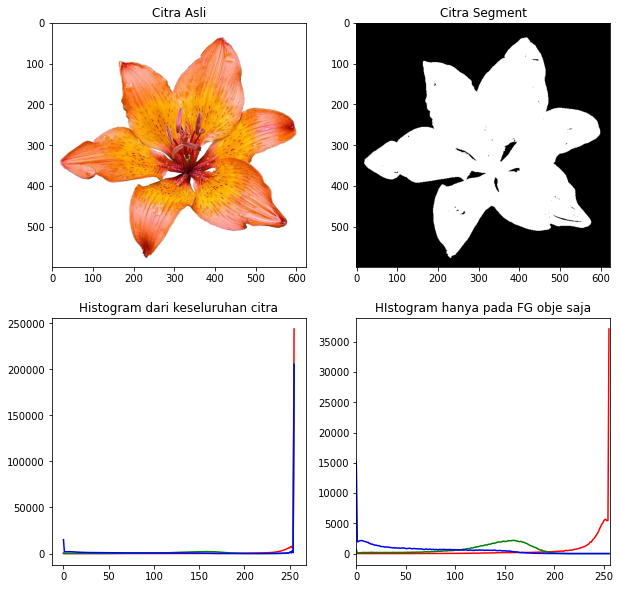

In [ ]:
lily = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/lily.jpg') 
lily = cv.cvtColor(lily, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(lily, cv.COLOR_BGR2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(lily)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i, col in enumerate(color):
  hist0 = cv.calcHist([lily],[i],None,[256],[0,256])
  plt.subplot(2,2,3), plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([lily],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('HIstogram hanya pada FG obje saja')
  plt.xlim([0,256])

plt.show()

<function matplotlib.pyplot.show>

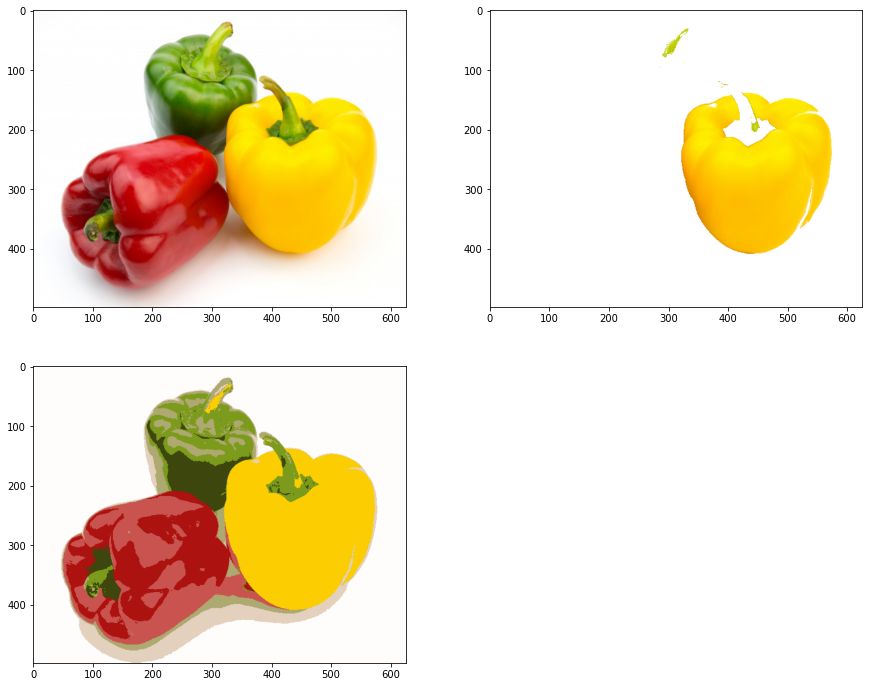

In [ ]:
pepper = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/peppers.jpg') 
pepper = cv.cvtColor(pepper,cv.COLOR_BGR2RGB)

pixel = pepper.reshape((-1, 3)) 
pixel = np.float32(pixel)

#syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
k = 8 
_, labels, (centers) = cv.kmeans(pixel, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer 
centers = np.uint8(centers)

#flattening label array 
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya 
segmented_image = centers[labels.flatten()] 
# reshape ke bentuk image asli 
segmented_image = segmented_image.reshape(pepper.shape)

masked_image = np.copy(pepper) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(pepper.shape)


plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(pepper) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 
plt.subplot(2,2,3),plt.imshow(segmented_image)

plt.show